In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.
import sys
from batteryml.pipeline import Pipeline
from batteryml.visualization.plot_helper import plot_capacity_degradation, plot_cycle_attribute, plot_result

%load_ext autoreload
%autoreload 2

# Basic Usage Of BatteryML Pipeline

## Create pipeline

In [2]:
# Create a pipeline with a configuration file, specifying the device and workspace. 
# Developers need to modify the data, feature, model and other related settings in the config file in advance. 
pipeline = Pipeline(config_path='configs/baselines/sklearn/variance_model/matr_1.yaml',
                    workspace='workspaces')

workspaces


## Train and evaluate

In [3]:
#model, dataset = pipeline.train(device='cuda', skip_if_executed=False)
model, dataset = pipeline.train(device='cpu', skip_if_executed=False)

Seed is set to 0.
Load datasets from cache cache/battery_cache_c0aece6019b0700ac98cd626968ea0a2.pkl.


In [4]:
train_prediction = model.predict(dataset, data_type='train')
train_loss = dataset.evaluate(train_prediction, 'RMSE', data_type='train') 
test_prediction = model.predict(dataset, data_type='test')
test_loss = dataset.evaluate(test_prediction, 'RMSE', data_type='test')
print(f'RMSE: Train {train_loss:.2f}, test {test_loss:.2f}')

RMSE: Train 122.05, test 136.13


In [5]:
pipeline.evaluate(model=model, dataset=dataset, skip_if_executed=False)

Seed is set to 0.
{'RMSE': 136.12962341308594}


## Plot train and test data

In [6]:
# get raw data from pipeline
train_cells, test_cells  = pipeline.raw_data['train_cells'], pipeline.raw_data['test_cells']

In [7]:
# display (train set) all battery cells' capacity degradation curve using plot_capacity_degradation function

plot_capacity_degradation(train_cells, title='plot degradation of train set discharge capacity', figsize=(8,6), n_legend_cols=2)

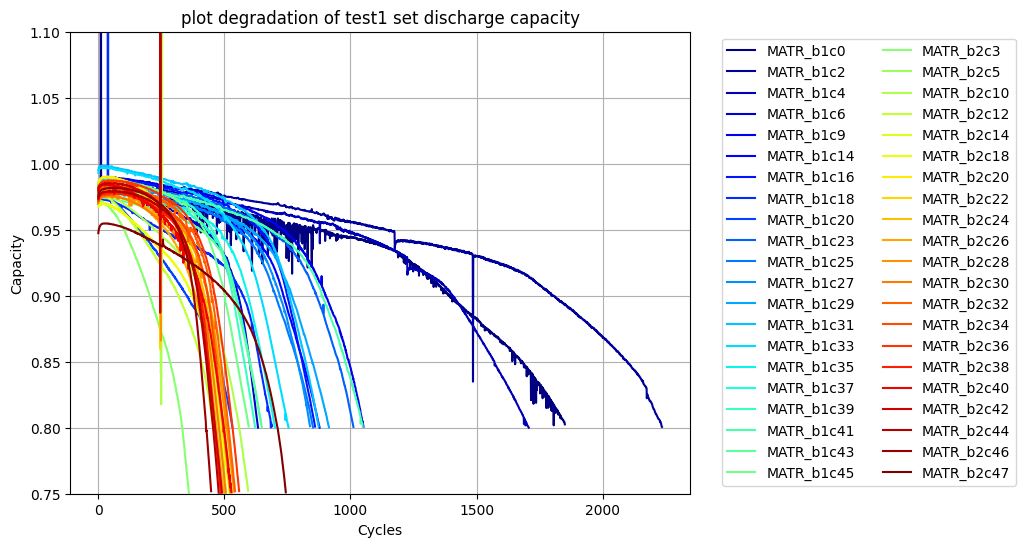

In [8]:
# display (test set) all battery cells' capacity degradation curve using plot_capacity_degradation function

plot_capacity_degradation(test_cells, title='plot degradation of test1 set discharge capacity', figsize=(8,6), n_legend_cols=2, ylim=(0.75,1.1))

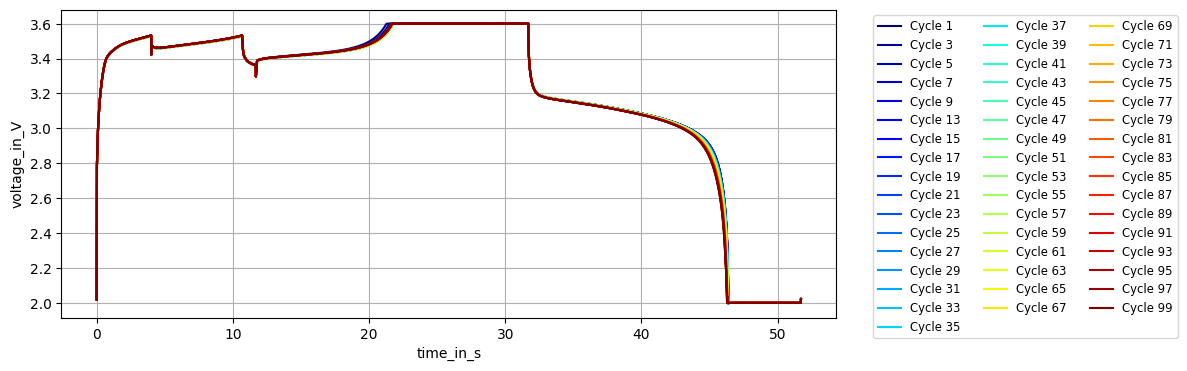

In [9]:
# plot cycle raw attribute such as "voltage_in_V","current_in_A","charge_capacity_in_Ah","discharge_capacity_in_Ah"...
cell_0 = train_cells[10]
indices = [i for i in range(0, 100, 2) if i!=10 ]
plot_cycle_attribute(cell_0.cycle_data, 'voltage_in_V', cycle_indices=indices, figsize=(10, 4))

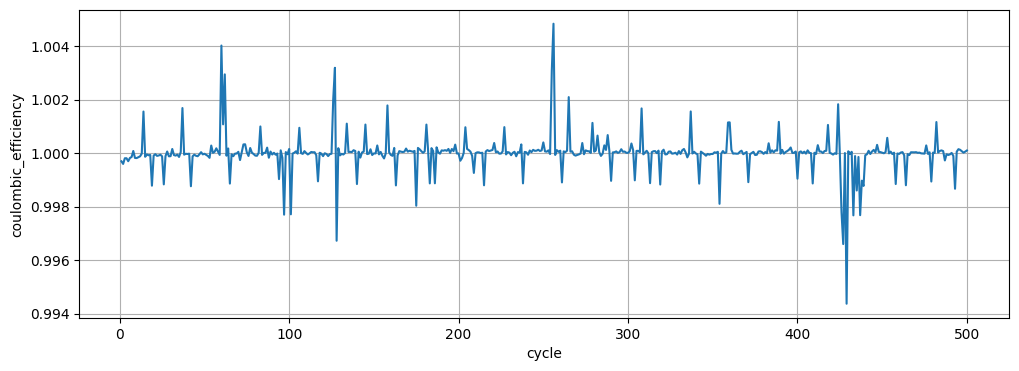

In [10]:
# plot cycle attribute such as "coulombic_efficiency"...
indices = [i for i in range(500) if i!=10 ]
plot_cycle_attribute(cell_0.cycle_data, 'coulombic_efficiency', cycle_indices=indices)

## Plot result

/Users/pedrobaiz/src/BatteryML/batteryml/visualization/plot_helper.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


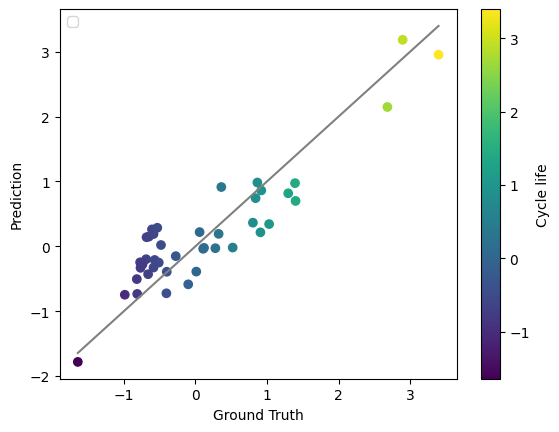

In [11]:
prediction = model.predict(dataset, data_type='test').to('cpu')
ground_truth = dataset.test_data.label.to('cpu')
plot_result(ground_truth, prediction)

# Baseline

In [12]:
import os
import pandas as pd
config_dir = 'configs/baselines/'
data1 = 'matr_1'
data2 = 'matr_2'
result=[]
#for method_type in os.listdir(config_dir): # PBV This is having problems with NN (so lets use sklearn)
for method_type in ['sklearn']:
    for method in os.listdir(os.path.join(config_dir, method_type)):
        print(method)
        config_path = os.path.join(config_dir, method_type, method, f'{data1}.yaml')
        pipeline = Pipeline(config_path=config_path, workspace=f'workspaces/{method}')
        # train_loss , test_loss = pipeline.train()
        #model, dataset = pipeline.train(device='cuda', skip_if_executed=False)
        model, dataset = pipeline.train(device='cpu', skip_if_executed=False)
        train_prediction = model.predict(dataset, data_type='train')
        train_loss = dataset.evaluate(train_prediction, 'RMSE', data_type='train') 
        test_prediction = model.predict(dataset, data_type='test')
        test_loss = dataset.evaluate(test_prediction, 'RMSE', data_type='test')
        
        config_path = os.path.join(config_dir, method_type, method, f'{data2}.yaml')
        pipeline = Pipeline(config_path=config_path,
                    workspace=f'workspaces/{method}')
        #model, dataset = pipeline.train(device='cuda', skip_if_executed=False)
        model, dataset = pipeline.train(device='cpu', skip_if_executed=False)
        test_prediction = model.predict(dataset, data_type='test')
        test2_loss = dataset.evaluate(test_prediction, 'RMSE', data_type='test')
        result.append([method, train_loss, test_loss, test2_loss])

res = pd.DataFrame(data=result, columns=['method', 'train_RMSE', 'test_RMSE', 'test2_RMSE'])

pcr
workspaces/pcr
Seed is set to 0.
Load datasets from cache cache/battery_cache_0ff5ff401e0feff22f54360eae76bc3f.pkl.
workspaces/pcr
Seed is set to 0.
Load datasets from cache cache/battery_cache_c0b1046b77cbeffed9ea29604f446c80.pkl.
dummy
workspaces/dummy
Seed is set to 0.
Load datasets from cache cache/battery_cache_c0aece6019b0700ac98cd626968ea0a2.pkl.
workspaces/dummy
Seed is set to 0.
Load datasets from cache cache/battery_cache_2fd3f212fd5353099b3bfd3a475514b2.pkl.
gpr
workspaces/gpr
Seed is set to 0.
Load datasets from cache cache/battery_cache_0ff5ff401e0feff22f54360eae76bc3f.pkl.
workspaces/gpr
Seed is set to 0.
Load datasets from cache cache/battery_cache_c0b1046b77cbeffed9ea29604f446c80.pkl.
variance_model
workspaces/variance_model
Seed is set to 0.
Load datasets from cache cache/battery_cache_c0aece6019b0700ac98cd626968ea0a2.pkl.
workspaces/variance_model
Seed is set to 0.
Load datasets from cache cache/battery_cache_2fd3f212fd5353099b3bfd3a475514b2.pkl.
discharge_model
w